In [98]:
import re
import os
import sys
import pandas as pd
import numpy as np

In [99]:
pipeline_dir = "galaxy_counts"
jax_dir = "jax_zscores"

In [17]:
input_files = os.popen("ls -1 ./" + pipeline_dir + " | sed 's/_.*//'").read()
files = input_files.split('\n')

#last element is dir name
for filename in files[:-1]:
    #download the relative files
    os.system("curl -o "+ filename + " http://tumor.informatics.jax.org/mtbwi/pdxDetails.do?modelID=" + filename)
    print(filename)
    textfile = open(filename, 'r')
    filetext = textfile.read()
    textfile.close()
    match = re.findall(".expression.*ToDataTable.*", filetext)
    genes = match[0].split('([')[1].split("],[")
    columns = []
    column_names = ['gene']
    #which columns to use, and which z-score values to use 
    for i,one in enumerate(genes[0].split('},')):
        if 'stRNA_Seq' in one:
            columns.append(i*2 + 1)
            column_names.append('stRNA_Seq')
        elif 'RNA_Seq' in one:
            columns.append(i*2 + 1)
            column_names.append('RNA_Seq')
            
    new = []
    for i,item in enumerate(genes[1:]):
        new.append(item.split(","))
        new[i][0] = new[i][0].strip("'")
    df = pd.DataFrame(new)
    df = df[[0,*columns]]
    df = df.set_axis(column_names, axis=1, inplace=False)
    df.to_csv(jax_dir+"/"+filename)
    print(df)
    os.remove(filename)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57871    0 57871    0     0  52099      0 --:--:--  0:00:01 --:--:-- 52136
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

J000092712
        gene RNA_Seq
0       A1CF   -0.36
1       ABL1    1.32
2     ACVR1B   -1.63
3       ADAR    0.96
4     ADARB1    2.15
..       ...     ...
352    XRCC3    0.27
353     YAP1    0.25
354     YES1    0.53
355  ZFP36L1    0.75
356  ZMYND19    0.06

[357 rows x 2 columns]


100 51998    0 51998    0     0  53075      0 --:--:-- --:--:-- --:--:-- 53059
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

J000106560
        gene stRNA_Seq
0       A1CF      0.46
1       ABL1      1.48
2     ACVR1B     -0.63
3       ADAR      0.79
4     ADARB1      0.11
..       ...       ...
352    XRCC3     -0.92
353     YAP1      0.55
354     YES1      0.07
355  ZFP36L1      0.12
356  ZMYND19     -0.67

[357 rows x 2 columns]


100 61327    0 61327    0     0  56780      0 --:--:--  0:00:01 --:--:-- 56836
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00016
        gene RNA_Seq
0       A1CF    0.39
1       ABL1   -0.26
2     ACVR1B    -0.6
3       ADAR    0.58
4     ADARB1    0.41
..       ...     ...
352    XRCC3    1.29
353     YAP1    0.25
354     YES1    0.81
355  ZFP36L1    0.38
356  ZMYND19    0.37

[357 rows x 2 columns]


100 59925    0 59925    0     0  58912      0 --:--:--  0:00:01 --:--:-- 58923
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00065
        gene stRNA_Seq
0       A1CF      0.37
1       ABL1      1.35
2     ACVR1B     -1.23
3       ADAR      0.02
4     ADARB1      1.16
..       ...       ...
352    XRCC3      -1.4
353     YAP1      0.47
354     YES1      0.48
355  ZFP36L1      0.38
356  ZMYND19     -0.93

[357 rows x 2 columns]


100 83940    0 83940    0     0  77694      0 --:--:--  0:00:01 --:--:-- 77722
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00089
        gene RNA_Seq
0       A1CF   -0.58
1       ABL1   -0.55
2     ACVR1B   -1.37
3       ADAR    0.87
4     ADARB1    0.58
..       ...     ...
352    XRCC3   -1.38
353     YAP1   -0.68
354     YES1    0.79
355  ZFP36L1    0.42
356  ZMYND19    -0.4

[357 rows x 2 columns]


100 69780    0 69780    0     0  54646      0 --:--:--  0:00:01 --:--:-- 54686
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00090
        gene RNA_Seq stRNA_Seq
0       A1CF    0.18      0.48
1       ABL1    0.38      0.42
2     ACVR1B   -0.89      -0.6
3       ADAR    0.94      1.05
4     ADARB1    0.42      0.08
..       ...     ...       ...
352    XRCC3    0.45      0.47
353     YAP1   -1.63     -0.09
354     YES1    0.04      0.31
355  ZFP36L1   -0.48      -0.2
356  ZMYND19   -0.86     -1.09

[357 rows x 3 columns]


100 69780    0 69780    0     0  53060      0 --:--:--  0:00:01 --:--:-- 53064
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00090
        gene RNA_Seq stRNA_Seq
0       A1CF    0.18      0.48
1       ABL1    0.38      0.42
2     ACVR1B   -0.89      -0.6
3       ADAR    0.94      1.05
4     ADARB1    0.42      0.08
..       ...     ...       ...
352    XRCC3    0.45      0.47
353     YAP1   -1.63     -0.09
354     YES1    0.04      0.31
355  ZFP36L1   -0.48      -0.2
356  ZMYND19   -0.86     -1.09

[357 rows x 3 columns]


100 67970    0 67970    0     0  60086      0 --:--:--  0:00:01 --:--:-- 60097
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00096
        gene RNA_Seq
0       A1CF    -0.4
1       ABL1   -1.78
2     ACVR1B    0.64
3       ADAR    0.63
4     ADARB1    0.65
..       ...     ...
352    XRCC3   -0.09
353     YAP1    0.41
354     YES1    0.82
355  ZFP36L1    -0.4
356  ZMYND19   -0.91

[357 rows x 2 columns]


100 64533    0 64533    0     0  64726      0 --:--:-- --:--:-- --:--:-- 64727
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00107
        gene stRNA_Seq
0       A1CF       0.4
1       ABL1      0.75
2     ACVR1B     -1.14
3       ADAR         1
4     ADARB1      0.03
..       ...       ...
352    XRCC3     -0.23
353     YAP1      0.29
354     YES1      0.63
355  ZFP36L1      0.49
356  ZMYND19      -0.3

[357 rows x 2 columns]


100 51098    0 51098    0     0  54491      0 --:--:-- --:--:-- --:--:-- 54475
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00137
        gene RNA_Seq
0       A1CF     1.1
1       ABL1    0.09
2     ACVR1B    0.76
3       ADAR   -2.45
4     ADARB1   -0.55
..       ...     ...
352    XRCC3       0
353     YAP1    0.31
354     YES1   -0.91
355  ZFP36L1    0.57
356  ZMYND19    0.77

[357 rows x 2 columns]


100 57458    0 57458    0     0  58674      0 --:--:-- --:--:-- --:--:-- 58630
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00170
        gene stRNA_Seq
0       A1CF      1.71
1       ABL1     -0.05
2     ACVR1B      1.47
3       ADAR      0.11
4     ADARB1     -0.44
..       ...       ...
352    XRCC3      0.04
353     YAP1      0.52
354     YES1      -0.4
355  ZFP36L1       0.3
356  ZMYND19     -0.33

[357 rows x 2 columns]


100 55880    0 55880    0     0  53589      0 --:--:--  0:00:01 --:--:-- 53627
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00226
        gene RNA_Seq
0       A1CF   -0.23
1       ABL1   -0.21
2     ACVR1B    1.43
3       ADAR     0.5
4     ADARB1    0.49
..       ...     ...
352    XRCC3   -0.99
353     YAP1    0.52
354     YES1    0.79
355  ZFP36L1   -0.63
356  ZMYND19    -1.2

[357 rows x 2 columns]


100 61649    0 61649    0     0  61928      0 --:--:-- --:--:-- --:--:-- 61896
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00231
        gene stRNA_Seq
0       A1CF      0.66
1       ABL1     -1.26
2     ACVR1B     -0.04
3       ADAR      -0.3
4     ADARB1      0.18
..       ...       ...
352    XRCC3      0.63
353     YAP1      0.51
354     YES1      0.72
355  ZFP36L1      0.51
356  ZMYND19     -0.65

[357 rows x 2 columns]


100 62530    0 62530    0     0  62731      0 --:--:-- --:--:-- --:--:-- 62718
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00256
        gene RNA_Seq
0       A1CF    0.09
1       ABL1    0.64
2     ACVR1B    0.62
3       ADAR    0.46
4     ADARB1   -0.63
..       ...     ...
352    XRCC3   -0.73
353     YAP1    0.18
354     YES1    0.02
355  ZFP36L1    0.57
356  ZMYND19    0.08

[357 rows x 2 columns]


100 51590    0 51590    0     0  59979      0 --:--:-- --:--:-- --:--:-- 59918
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00279
        gene stRNA_Seq
0       A1CF      0.73
1       ABL1      1.41
2     ACVR1B     -0.64
3       ADAR      -2.2
4     ADARB1      1.67
..       ...       ...
352    XRCC3      -0.4
353     YAP1      0.51
354     YES1      0.33
355  ZFP36L1      0.42
356  ZMYND19     -0.55

[357 rows x 2 columns]


100 51262    0 51262    0     0  58856      0 --:--:-- --:--:-- --:--:-- 58854
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00314
        gene stRNA_Seq
0       A1CF       1.7
1       ABL1     -0.18
2     ACVR1B      1.18
3       ADAR     -0.08
4     ADARB1     -0.94
..       ...       ...
352    XRCC3     -1.88
353     YAP1       0.4
354     YES1      0.24
355  ZFP36L1      0.28
356  ZMYND19      0.22

[357 rows x 2 columns]


100 59313    0 59313    0     0  51226      0 --:--:--  0:00:01 --:--:-- 51264
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00335
        gene stRNA_Seq
0       A1CF      0.32
1       ABL1      -0.9
2     ACVR1B      1.06
3       ADAR      0.93
4     ADARB1      0.85
..       ...       ...
352    XRCC3     -0.11
353     YAP1      0.51
354     YES1     -1.13
355  ZFP36L1      0.34
356  ZMYND19      0.62

[357 rows x 2 columns]


100 67747    0 67747    0     0  67758      0 --:--:-- --:--:-- --:--:-- 67747
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

TM00999
        gene RNA_Seq
0       A1CF   -0.52
1       ABL1    0.81
2     ACVR1B   -1.44
3       ADAR    1.15
4     ADARB1    1.95
..       ...     ...
352    XRCC3   -0.41
353     YAP1    0.12
354     YES1     1.3
355  ZFP36L1   -1.07
356  ZMYND19    0.97

[357 rows x 2 columns]
TM01571
        gene RNA_Seq
0       A1CF   -0.19
1       ABL1    1.59
2     ACVR1B   -1.05
3       ADAR   -1.79
4     ADARB1    0.56
..       ...     ...
352    XRCC3   -0.41
353     YAP1     0.2
354     YES1    0.44
355  ZFP36L1    0.53
356  ZMYND19    1.44

[357 rows x 2 columns]


100 46461    0 46461    0     0  64101      0 --:--:-- --:--:-- --:--:-- 64084


In [5]:
input_files = os.popen("ls -1 ./"+ pipeline_dir).read()
files = input_files.split('\n')
normalized_dir="galaxy_normalized_by_sample"

for filename in files[:-1]:
    df = pd.read_table(pipeline_dir+"/"+filename)
    df = df.set_axis(['gene','id','count'], axis=1, inplace=False)
    df = df.drop(labels='id',axis=1)
    # remove zero valued genes
    df = df.loc[df['count'] != 0]
    df['count'] = df['count'].div(df['count'].quantile(q=0.75))
    print(df)
    df.to_csv(normalized_dir+"/"+filename.split('_')[0])

             gene     count
0          TSPAN6  1.644079
2            DPM1  1.382453
3           SCYL3  1.187054
4        C1orf112  1.698664
5             FGR  0.002039
...           ...       ...
60669  AC114778.2  0.001142
60671    Z97205.3  0.001020
60672  AC010184.1  0.006688
60673  AL357874.3  0.014273
60674  AL645933.5  0.116611

[27436 rows x 2 columns]
             gene     count
0          TSPAN6  1.063986
2            DPM1  1.972314
3           SCYL3  0.860223
4        C1orf112  0.658895
5             FGR  0.007447
...           ...       ...
60670  AL162231.5  0.001064
60671    Z97205.3  0.003351
60672  AC010184.1  0.004585
60673  AL357874.3  0.017021
60674  AL645933.5  0.007245

[29920 rows x 2 columns]
             gene     count
0          TSPAN6  1.650407
2            DPM1  2.548829
3           SCYL3  0.441454
4        C1orf112  0.865824
5             FGR  0.006596
...           ...       ...
60667  AC023296.1  0.001319
60669  AC114778.2  0.002850
60672  AC010184.1  0.010

In [10]:
input_files = os.popen("ls -1 ./"+ jax_dir).read()
files = input_files.split('\n')
pipeline_norm_dir = "galaxy_normalized_by_sample"
jax_rna = "jax_normalized_rna"
jax_strna = "jax_normalized_strna"

rna = pd.read_csv("rnaseq_expn.csv", delimiter=';')
rna = rna.drop(labels=['ensembl_gene_id', 'platform'],axis=1)
rna = rna.rename(columns={"gene_symbol_hint": "gene"})
rna['mean'] = (rna['mean'].str.split()).apply(lambda x: float(x[0].replace(',', '.'))).astype(float)
rna['sd'] = (rna['sd'].str.split()).apply(lambda x: float(x[0].replace(',', '.'))).astype(float)

strna = pd.read_csv("strnaseq_expn.csv", delimiter=';')
strna = strna.drop(labels=['ensembl_gene_id', 'platform'],axis=1)
strna = strna.rename(columns={"gene_symbol_hint": "gene"})
strna['mean'] = (strna['mean'].str.split()).apply(lambda x: float(x[0].replace(',', '.'))).astype(float)
strna['sd'] = (strna['sd'].str.split()).apply(lambda x: float(x[0].replace(',', '.'))).astype(float)


for filename in files[:-1]:
    print(filename)
    
    z_score = pd.read_csv(jax_dir+"/"+filename)
    normalized = pd.read_csv(pipeline_norm_dir+"/"+filename)
    
    #somehow this ugly extra column appeared in the csv
    z_score = z_score.drop(labels='Unnamed: 0',axis=1)
    normalized = normalized.drop(labels='Unnamed: 0',axis=1)
    
    
    #print(z_score)
    #print(rna)
    #print(normalized)
    #print(normalized.loc[normalized['gene'] == 'A1CF'].iloc[0])
    norm_factors = []
    stgene = []
    gene = []
    counts_strna = []
    counts_rna = []
    counts = 0
    i = 0
    
    for index, row in z_score.iterrows():
        if 'stRNA_Seq' in z_score:
            if strna.isin([row['gene']]).any().any():
                if normalized.isin([row['gene']]).any().any():
                    mean = strna.loc[strna['gene'] == row['gene']].iloc[0]['mean']
                    sd = strna.loc[strna['gene'] == row['gene']].iloc[0]['sd']
                    count = (float(row['stRNA_Seq'])*sd)+mean
                    stgene.append(row['gene'])
                    counts_strna.append(count)
        if 'RNA_Seq' in z_score:
            if rna.isin([row['gene']]).any().any():
                if normalized.isin([row['gene']]).any().any():
                    mean = rna.loc[rna['gene'] == row['gene']].iloc[0]['mean']
                    sd = rna.loc[rna['gene'] == row['gene']].iloc[0]['sd']
                    count = (float(row['RNA_Seq'])*sd)+mean
                    stgene.append(row['gene'])
                    counts_strna.append(count)
                    #norm_factor = float(normalized[normalized['gene'] == row['gene']].iloc[0]['count']) / count
                    #norm_factors.append(norm_factor)
                    #counts += norm_factor
                    #i += 1
                    
    if 'stRNA_Seq' in z_score:
        dictt = {'gene': stgene, 'count': counts_strna} 
        df = pd.DataFrame(dictt)
        print(df)
        df.to_csv(jax_strna+"/"+filename)
    if 'RNA_Seq' in z_score:
        dictt = {'gene': stgene, 'count': counts_strna} 
        df = pd.DataFrame(dictt)
        print(df)
        df.to_csv(jax_rna+"/"+filename)
    #print(counts/i)
    #print(max(norm_factors), " ", min(norm_factors))

J000092712
        gene      count
0       ABL1  12.603812
1     ACVR1B   9.209382
2       ADAR  14.254944
3     ADARB1  12.878800
4       AGO1  10.725500
..       ...        ...
322    XRCC3   9.934656
323     YAP1  12.341800
324     YES1  12.135435
325  ZFP36L1  13.252550
326  ZMYND19   9.720186

[327 rows x 2 columns]
J000106560
        gene      count
0       ABL1  12.656488
1     ACVR1B   9.711981
2       ADAR  14.185948
3     ADARB1   9.081463
4       AGO1  11.464985
..       ...        ...
322    XRCC3   8.419992
323     YAP1  12.707090
324     YES1  11.909295
325  ZFP36L1  12.331412
326  ZMYND19   8.996276

[327 rows x 2 columns]
TM00016
        gene      count
0       A1CF   5.205280
1       ABL1  11.360984
2     ACVR1B  10.176140
3       ADAR  14.007412
4     ADARB1   9.343120
..       ...        ...
312    XRCC3  10.651512
313     YAP1  12.341800
314     YES1  12.418095
315  ZFP36L1  12.737288
316  ZMYND19   9.927297

[317 rows x 2 columns]
TM00065
        gene      count
0 

0.9522565214929398 0.9858204959616322


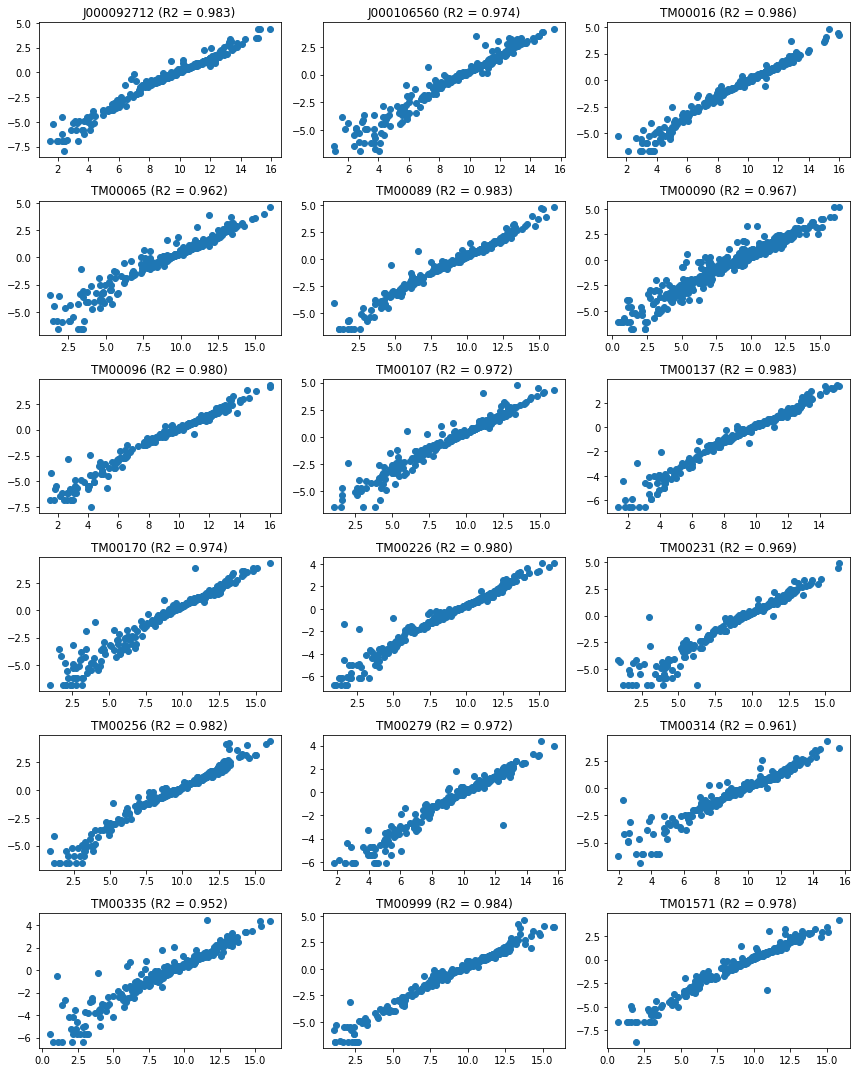

In [112]:
#sample='TM00089'

fig = plt.figure(figsize=(12,15))
axes = fig.subplots(6,3)

cr = {}
i=0
for r in axes:
    for p in r:
        sample=files[i]
        try:
            jax=pd.read_csv(f"{jax_rna}/{sample}",usecols=['gene','count'],index_col='gene')
        except FileNotFoundError:
            jax=pd.read_csv(f"{jax_strna}/{sample}",usecols=['gene','count'],index_col='gene')
        
        our=pd.read_csv(f"{pipeline_norm_dir}/{sample}",usecols=['gene','count'],index_col='gene')
        our = np.log(our.loc[jax.index])
 #       p.set_yscale('log')
        p.scatter(jax['count'],our['count'])
        cr[sample] = our['count'].corr(jax['count'])
        p.set_title(f"{sample} (R2 = {cr[sample]:.3f})")
        i += 1
        
        
        
fig.tight_layout()    
fig.savefig('scatter.pdf')
fig.show()

print(min(cr.values()),max(cr.values()))

In [105]:
import numpy as np
#jax /= jax.max()
ourl = np.log(our)
#ourl /= ourl.max()

In [106]:
ourl['count'].corr(jax['count'])

0.9776736516417387

In [48]:
our = our.loc[jax.index]

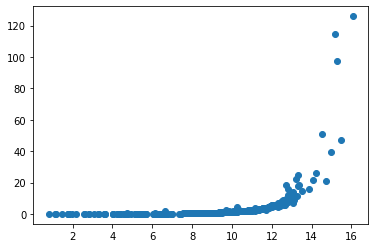

In [50]:
import matplotlib.pyplot as plt

plt.scatter(jax['count'],our['count'])

In [51]:
files

['J000092712',
 'J000106560',
 'TM00016',
 'TM00065',
 'TM00089',
 'TM00090',
 'TM00096',
 'TM00107',
 'TM00137',
 'TM00170',
 'TM00226',
 'TM00231',
 'TM00256',
 'TM00279',
 'TM00314',
 'TM00335',
 'TM00999',
 'TM01571',
 '']

In [52]:
len(files)

19

In [66]:
len(jax.index)

329

In [67]:
jax.index

Index(['A1CF', 'ABL1', 'ACVR1B', 'ADAR', 'ADARB1', 'AGO1', 'AGO2', 'AGO3',
       'AGO4', 'AKT1',
       ...
       'USH2A', 'VHL', 'WNT7A', 'WWTR1', 'XRCC2', 'XRCC3', 'YAP1', 'YES1',
       'ZFP36L1', 'ZMYND19'],
      dtype='object', name='gene', length=329)